In [1]:
%load_ext autoreload
%autoreload 2

import anndata
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import scanpy as sc
import scipy
import seaborn as sns
from sklearn import decomposition
import time
import warnings
import umap

import sfaira

usr = !echo $USER
base_path = '.'
base_path_out = '.'

grid_search_dir = '.'
datadir = '.'
targetpath = '.'
configpath = '.'
outdir = base_path_out + '/results/'
figdir = outdir+'/figures/'

sc.logging.print_version_and_date()
sc.settings.verbosity = 0
sc.settings.figdir = figdir

Ontology <class 'sfaira.versions.metadata.base.OntologyMondo'> is not a DAG, treat child-parent reasoning with care.
Ontology <class 'sfaira.versions.metadata.base.OntologyUberon'> is not a DAG, treat child-parent reasoning with care.
Running Scanpy 1.7.2, on 2021-05-28 15:34.


In [2]:
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'x-large',
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

# Summarise annotated cells

In [5]:
store = sfaira.data.load_store(datadir, store_format="h5ad")
store.subset(attr_key="annotated", values=[True])

Discovered mouse_placenta_2018_microwellseq_han_052.h5ad as .h5ad file.
Discovered mouse_thymus_2019_10xsequencing_pisco_034.h5ad as .h5ad file.
Discovered mouse_muscleorgan_2019_10xsequencing_pisco_026.h5ad as .h5ad file.
Discovered human_colonicepithelium_2019_10xsequencing_smilie_001.h5ad as .h5ad file.
Discovered human_testis_2018_10xsequencing_guo_001.h5ad as .h5ad file.
Discovered mouse_heart_2019_10xsequencing_pisco_015.h5ad as .h5ad file.
Discovered mouse_bonemarrow_2018_microwellseq_han_005.h5ad as .h5ad file.
Discovered mouse_blood_2018_microwellseq_han_048.h5ad as .h5ad file.
Discovered mouse_pancreas_2019_10xsequencing_thompson_001.h5ad as .h5ad file.
Discovered mouse_intestine_2018_microwellseq_han_010.h5ad as .h5ad file.
Discovered mouse_brain_2018_microwellseq_han_006.h5ad as .h5ad file.
Discovered mouse_blood_2018_microwellseq_han_050.h5ad as .h5ad file.
Discovered human_placenta_2018_smartseq2_ventotormo_002.h5ad as .h5ad file.
Discovered mouse_testis_2018_microwellseq

Discovered mouse_bonemarrow_2019_10xsequencing_pisco_008.h5ad as .h5ad file.
Discovered mouse_prostategland_2018_microwellseq_han_055.h5ad as .h5ad file.
Discovered mouse_testis_2018_microwellseq_han_064.h5ad as .h5ad file.
Discovered human_retina_2019_10xsequencing_voigt_001.h5ad as .h5ad file.
Discovered mouse_kidney_2019_smartseq2_pisco_019.h5ad as .h5ad file.
Discovered mouse_pancreas_2019_10xsequencing_thompson_002.h5ad as .h5ad file.
Discovered human_lung_2020_10xsequencing_miller_001.h5ad as .h5ad file.
Discovered human_blood_2019_10xsequencing_szabo_013.h5ad as .h5ad file.
Discovered human_rectum_2019_10xsequencing_wang_003.h5ad as .h5ad file.
Discovered mouse_lung_2018_microwellseq_han_014.h5ad as .h5ad file.
Discovered mouse_bonemarrow_2018_microwellseq_han_002.h5ad as .h5ad file.
Discovered human_lung_2019_10xsequencing_szabo_008.h5ad as .h5ad file.
Discovered mouse_brain_2019_smartseq2_pisco_010.h5ad as .h5ad file.
Discovered mouse_muscleorgan_2019_smartseq2_pisco_027.h5ad 

matched keys [True] in data set mouse_urinarybladder_2019_10xsequencing_pisco_006_10.1101/661728
matched keys [True] in data set human_lung_2020_10xsequencing_lukassen_001_10.1101/2020.03.13.991455
matched keys [True] in data set mouse_lung_2019_smartseq2_pisco_023_10.1101/661728
matched keys [True] in data set human_prostategland_2018_10xsequencing_henry_001_10.1016/j.celrep.2018.11.086
matched keys [True] in data set mouse_ovary_2018_microwellseq_han_043_10.1016/j.cell.2018.02.001
matched keys [True] in data set human_spleen_2019_10xsequencing_madissoon_003_10.1186/s13059-019-1906-x
matched keys [True] in data set mouse_pancreas_2019_10xsequencing_pisco_028_10.1101/661728
matched keys [True] in data set mouse_kidney_2018_microwellseq_han_018_10.1016/j.cell.2018.02.001
matched keys [True] in data set human_liver_2019_celseq2_aizarani_001_10.1038/s41586-019-1373-2
matched keys [True] in data set mouse_aorta_2019_smartseq2_pisco_017_10.1101/661728
matched keys [True] in data set mouse_a

matched keys [True] in data set human_laminapropriaofmucosaofcolon_2019_10xsequencing_kinchen_002_10.1016/j.cell.2018.08.067
matched keys [True] in data set mouse_ovary_2018_microwellseq_han_044_10.1016/j.cell.2018.02.001
matched keys [True] in data set human_placenta_2018_10xsequencing_ventotormo_001_10.1038/s41586-018-0698-6
matched keys [True] in data set mouse_rib_2018_microwellseq_han_038_10.1016/j.cell.2018.02.001
matched keys [True] in data set mouse_colon_2019_10xsequencing_pisco_012_10.1101/661728
matched keys [True] in data set human_lungparenchyma_2019_10xsequencing_braga_001_10.1038/s41591-019-0468-5
matched keys [True] in data set human_bonemarrow_2019_10xsequencing_szabo_010_10.1038/s41467-019-12464-3
matched keys [True] in data set mouse_adiposetissue_2019_smartseq2_pisco_004_10.1101/661728
matched keys [True] in data set human_lung_2020_10xsequencing_lukassen_002_10.1101/2020.03.13.991455
matched keys [True] in data set mouse_thymus_2019_smartseq2_pisco_035_10.1101/6617

In [15]:
def load_annotation_stats():
    summary_tab = {}
    for k, v in store.indices.items():
        counts = np.sum([
            x not in [store._adata_ids_sfaira.not_a_cell_celltype_identifier,
                      store._adata_ids_sfaira.unknown_celltype_identifier]
            for x in store.adata_by_key[k].obs["cell_ontology_class"].values[v]
        ])
        if counts > 0:
            summary_tab[k] = counts
    return pd.DataFrame({"count": summary_tab.values()}, index=summary_tab.keys())

tab = load_annotation_stats()
print(tab.shape)
print(tab["count"].values.sum())

(149, 1)
6642370


# Mouse - all data sets

In [3]:
store = sfaira.data.load_store(datadir, store_format="h5ad")
store.subset(attr_key="organism", values=["mouse"])

Discovered mouse_placenta_2018_microwellseq_han_052.h5ad as .h5ad file.
Discovered mouse_thymus_2019_10xsequencing_pisco_034.h5ad as .h5ad file.
Discovered mouse_muscleorgan_2019_10xsequencing_pisco_026.h5ad as .h5ad file.
Discovered human_colonicepithelium_2019_10xsequencing_smilie_001.h5ad as .h5ad file.
Discovered human_testis_2018_10xsequencing_guo_001.h5ad as .h5ad file.
Discovered mouse_heart_2019_10xsequencing_pisco_015.h5ad as .h5ad file.
Discovered mouse_bonemarrow_2018_microwellseq_han_005.h5ad as .h5ad file.
Discovered mouse_blood_2018_microwellseq_han_048.h5ad as .h5ad file.
Discovered mouse_pancreas_2019_10xsequencing_thompson_001.h5ad as .h5ad file.
Discovered mouse_intestine_2018_microwellseq_han_010.h5ad as .h5ad file.
Discovered mouse_brain_2018_microwellseq_han_006.h5ad as .h5ad file.
Discovered mouse_blood_2018_microwellseq_han_050.h5ad as .h5ad file.
Discovered human_placenta_2018_smartseq2_ventotormo_002.h5ad as .h5ad file.
Discovered mouse_testis_2018_microwellseq

Discovered mouse_bonemarrow_2019_10xsequencing_pisco_008.h5ad as .h5ad file.
Discovered mouse_prostategland_2018_microwellseq_han_055.h5ad as .h5ad file.
Discovered mouse_testis_2018_microwellseq_han_064.h5ad as .h5ad file.
Discovered human_retina_2019_10xsequencing_voigt_001.h5ad as .h5ad file.
Discovered mouse_kidney_2019_smartseq2_pisco_019.h5ad as .h5ad file.
Discovered mouse_pancreas_2019_10xsequencing_thompson_002.h5ad as .h5ad file.
Discovered human_lung_2020_10xsequencing_miller_001.h5ad as .h5ad file.
Discovered human_blood_2019_10xsequencing_szabo_013.h5ad as .h5ad file.
Discovered human_rectum_2019_10xsequencing_wang_003.h5ad as .h5ad file.
Discovered mouse_lung_2018_microwellseq_han_014.h5ad as .h5ad file.
Discovered mouse_bonemarrow_2018_microwellseq_han_002.h5ad as .h5ad file.
Discovered human_lung_2019_10xsequencing_szabo_008.h5ad as .h5ad file.
Discovered mouse_brain_2019_smartseq2_pisco_010.h5ad as .h5ad file.
Discovered mouse_muscleorgan_2019_smartseq2_pisco_027.h5ad 

matched keys ['mouse'] in data set mouse_aorta_2019_smartseq2_pisco_017_10.1101/661728
matched keys ['mouse'] in data set mouse_stomach_2018_microwellseq_han_017_10.1016/j.cell.2018.02.001
matched keys ['mouse'] in data set mouse_adiposetissue_2019_smartseq2_pisco_003_10.1101/661728
matched keys ['mouse'] in data set mouse_pancreas_2019_smartseq2_pisco_029_10.1101/661728
matched keys ['mouse'] in data set mouse_kidney_2019_10xsequencing_pisco_018_10.1101/661728
matched keys ['mouse'] in data set mouse_placenta_2018_microwellseq_han_053_10.1016/j.cell.2018.02.001
matched keys ['mouse'] in data set mouse_stomach_2018_microwellseq_han_061_10.1016/j.cell.2018.02.001
matched keys ['mouse'] in data set mouse_skeletalmuscleorgan_2018_microwellseq_han_031_10.1016/j.cell.2018.02.001
matched keys ['mouse'] in data set mouse_blood_2018_microwellseq_han_049_10.1016/j.cell.2018.02.001
matched keys ['mouse'] in data set mouse_bonemarrow_2018_microwellseq_han_004_10.1016/j.cell.2018.02.001
matched ke

In [25]:
def load_celltype_stats(ids, mode="raw"):
    summary_tab = []
    counter = 0
    for i, (k, v) in enumerate(store.indices.items()):
        if "cell_ontology_class" in store.adata_by_key[k].obs.columns:
            if mode == "raw" or mode == "mean":
                adata = store.adata_by_key[k][v, :].to_memory()
                sf = np.asarray(adata.X.sum(axis=1)).flatten() / 10000
                sf[sf == 0.] = 1.
            else:
                # Target genes are enough!
                adata = store.adata_by_key[k][v, ids].to_memory()
            summary_tab.append(
                pd.DataFrame({
                    "dataset": k,
                    "organ": adata.obs["organ"].values,
                    "cell_type": adata.obs["cell_ontology_class"].values,
                })
            )
            if mode == "raw" or mode == "mean":
                for tg in ids:
                    if tg in adata.var_names:
                        summary_tab[counter][tg] = np.asarray(adata[:, tg].X.todense()).flatten() / sf
                    else:
                        summary_tab[counter][tg] = sf * 0.
                if mode == "mean":
                    summary_tab[counter] = summary_tab[counter].groupby(["organ", "dataset", "cell_type"]).mean().reset_index()
            elif mode == "cor":
                assert len(ids) == 2
                cor = {}
                for ct in np.unique(summary_tab[counter]["cell_type"]):
                    cor[ct] = np.corrcoef(
                        np.asarray(adata[adata.obs["cell_ontology_class"].values == ct, ids].X.todense()).T
                    )[0, 1]
                summary_tab[counter]["cor"] = [
                    cor[ct] for ct in summary_tab[counter]["cell_type"].values
                ]
            counter += 1
    summary_tab = pd.concat(summary_tab, axis=0).sort_values(["organ", "dataset", "cell_type"])
    return summary_tab

In [21]:
target_genes = [
    "ENSMUSG00000035804"  # Ins1
]
summary_tab_means = load_celltype_stats(target_genes, mode="mean")

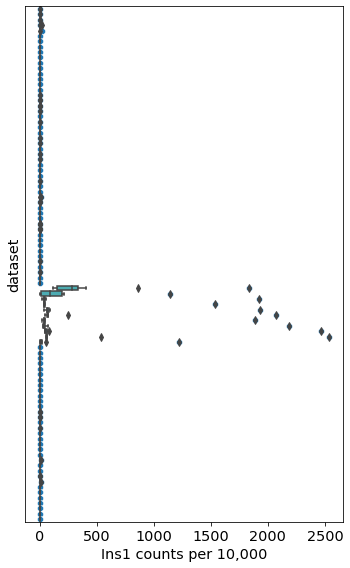

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8))
sns.boxplot(
    data=summary_tab_means, 
    y="dataset",
    x="ENSMUSG00000035804",
    ax=ax
)
sns.scatterplot(
    data=summary_tab_means.groupby(["dataset"]).max().reset_index(), 
    y="dataset",
    x="ENSMUSG00000035804",
    ax=ax
)
ax.set_yticks([])
ax.set_xlabel('Ins1 counts per 10,000')
plt.tight_layout()
plt.savefig(figdir + "data_mouse_gene_overview_mean.pdf")
plt.show()

In [23]:
print(
    f"found high expressing cells in organs: "
    f"{np.unique(summary_tab_means.loc[summary_tab_means['ENSMUSG00000035804'].values > 50, 'organ'].values)}"
)

found high expressing cells in organs: ['pancreas']


In [26]:
target_genes = [
    "ENSMUSG00000005410",  # Mcm5
    "ENSMUSG00000027342",  # Pcna
]
summary_tab_cor = load_celltype_stats(ids=target_genes, mode="cor")

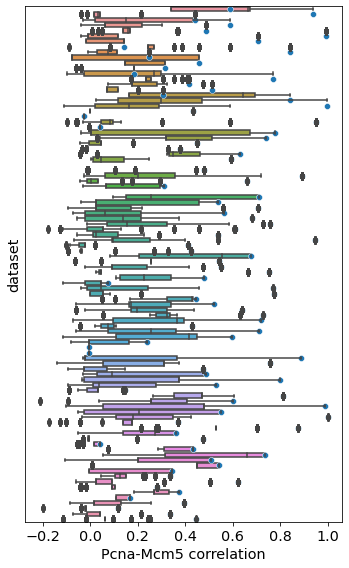

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8))
sns.boxplot(
    data=summary_tab_cor, 
    y="dataset",
    x="cor",
    ax=ax
)
sns.scatterplot(
    data=summary_tab_cor.groupby(["dataset"]).max().reset_index(), 
    y="dataset",
    x="cor",
    ax=ax
)
ax.set_yticks([])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_yscale('log')
ax.set_xlabel('Pcna-Mcm5 correlation')
plt.tight_layout()
plt.savefig(figdir + "data_mouse_gene_overview_cor.pdf")
plt.show()

# Count T cells per data set

In [44]:
def load_celltype_freqs(ontology_parent):
    fracs = []
    for i, (k, v) in enumerate(store.indices.items()):
        if "cell_ontology_class" in store.adata_by_key[k].obs.columns:
            obs = store.adata_by_key[k].obs.loc[:, ["cell_ontology_class", "organ"]].iloc[v, :]
            if "cell_ontology_class" in obs.columns:
                cell_types_found = np.unique(obs["cell_ontology_class"].values)
                cell_types_tcells = [
                    x for x in cell_types_found 
                    if x != "UNKNOWN" and x is not None and
                    sfaira.data.base.dataset.is_child(query=x, ontology_parent=ontology_parent, 
                                                      ontology=sfaira.consts.OCS.cellontology_class)
                ]
                fracs.append(pd.DataFrame({
                    "dataset": k,
                    "organ": np.unique(obs["organ"].values),
                    "fraction": np.mean([
                        x in cell_types_tcells
                        for x in obs["cell_ontology_class"].values
                    ])
                }))
    fracs = pd.concat(fracs, axis=0)
    return fracs

In [45]:
tcell_frac = load_celltype_freqs(ontology_parent="T cell")

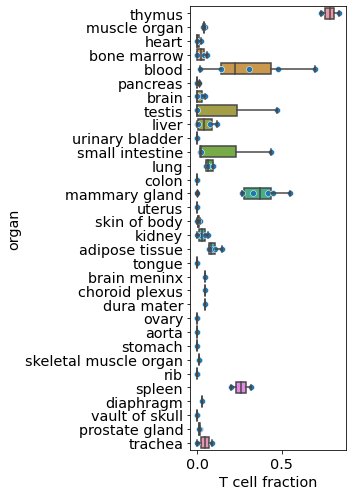

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(5, 7))
sns.boxplot(
    data=tcell_frac, 
    y="organ",
    x="fraction",
    ax=ax
)
sns.scatterplot(
    data=tcell_frac, 
    y="organ",
    x="fraction",
    ax=ax
)
ax.set_xlabel('T cell fraction')
plt.tight_layout()
plt.savefig(figdir + "data_mouse_tcell_fraction.pdf")
plt.show()